In [4]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import fft 
import math as m

In [5]:
def wavenum(i, N) : return (i + N // 2) % N - N // 2

([], [])

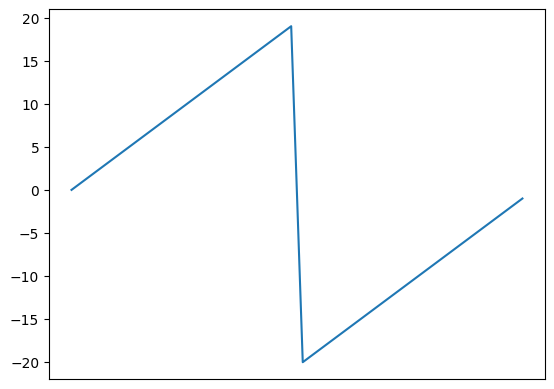

In [8]:
banana = 40
test_size = np.arange(banana)
plt.plot(test_size, wavenum(test_size, banana))
plt.xticks([])

Text(0.5, 0, 'Frequencies.')

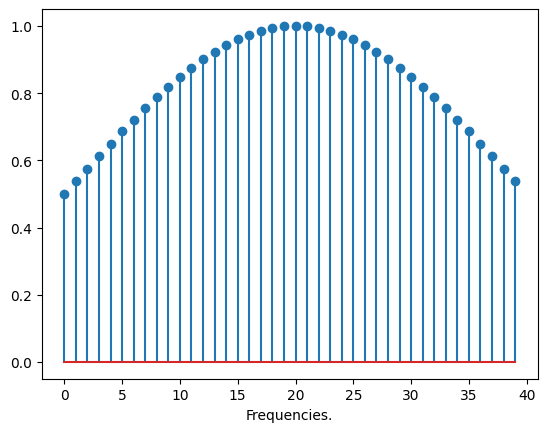

In [10]:
# Create filter.
filter_size = 40

M = 1
H = np.zeros(filter_size, dtype=complex)

for i in range(filter_size):
    k = wavenum(i, filter_size)
    a = 2 * np.pi / filter_size * k * M 
    
    #G_b, integral from -M to M of cos(t*pi/M) e^(-iwt)
    if (m.isclose(a, np.pi/M)):
        H[i] = M
    elif (m.isclose(a, -np.pi/M)):
        H[i] = M
    else:
        H[i] += -(2 * M**2 * a * np.sin(M * a))/(M**2 * a**2 - np.pi**2)

    # G_a, integral from -M to M of e^(-iwt)
    if a != 0:
        H[i] += 2 * np.sin(M * a) / a
    else:
        H[i] = 2 * M
        
        
H /= 2.0 * M

plt.stem(np.arange(filter_size),  np.fft.fftshift(H).real)
plt.xlabel("Frequencies.")

Text(0.5, 0, 'Time Domain')

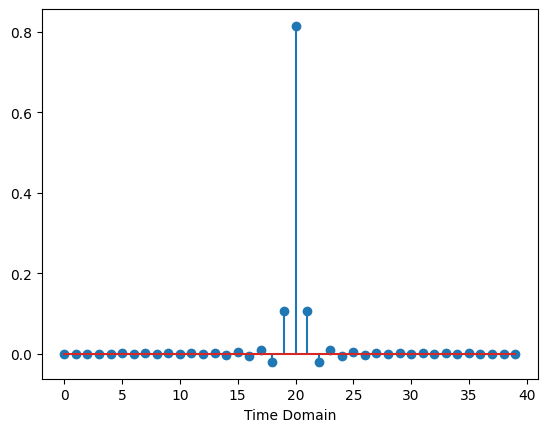

In [11]:
# Inverse Fourier Transform of the filter, fftshifted. TIME DOMAIN
h = np.fft.ifft(H)
plt.stem(np.arange(filter_size), np.fft.fftshift(h).real)
plt.xlabel("Time Domain")

Text(0.5, 0, 'Frequency domain')

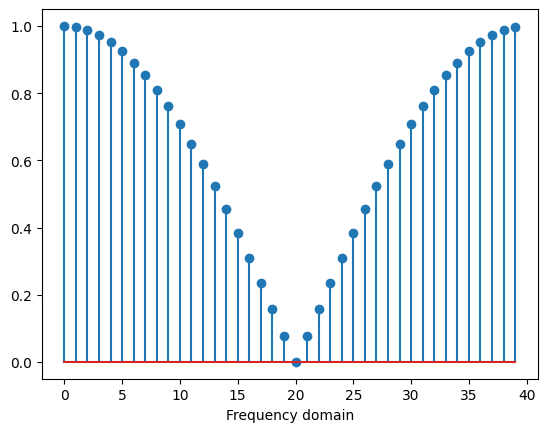

In [20]:
#Shift phase. Based on size of filter since it is that which we are shifting now.
SHIFT = 20.5
delta = SHIFT % 1
L = np.zeros(filter_size, dtype=complex)
for i in range(filter_size):
    L[i] = np.exp(-2j * np.pi * delta * wavenum(i,filter_size)/filter_size)
plt.stem(np.arange(filter_size), L.real)
plt.xlabel("Frequency domain")

Text(0.5, 0, 'Frequencies.')

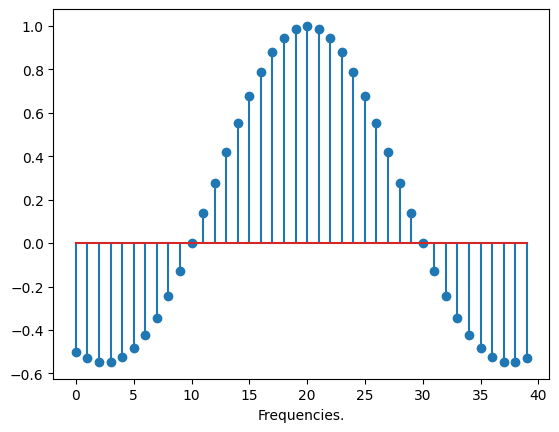

In [15]:
plt.stem(np.arange(filter_size), np.fft.fftshift((L * H).real))
plt.xlabel("Frequencies.")

(0.5664223772726479+0.0125j)
(0.5664223772726479-0.0125j)
(-0.1036761500425659+0.0125j)
(0.06256705592950543-0.0125j)
(-0.044232464822407225+0.0125j)
(0.0338427484421415-0.0125j)
(-0.027093249640122177+0.0125j)
(0.022307634151974665-0.0125j)
(-0.018699395923162745+0.0125j)
(0.01585062596753986-0.0125j)
(-0.013518503687815276+0.0125j)
(0.01155202711706665-0.0125j)
(-0.009852081868831115+0.0125j)
(0.008350629940856696-0.0125j)
(-0.006999117667768235+0.0125j)
(0.005761653798197353-0.0125j)
(-0.004610800280602634+0.0125j)
(0.0035248613284687303-0.0125j)
(-0.0024860629068701855+0.0125j)
(0.001479274229362366-0.0125j)
(-0.000491061337615538+0.0125j)
(-0.0004910613376155615-0.0125j)
(0.0014792742293623208+0.0125j)
(-0.002486062906870175-0.0125j)
(0.0035248613284687424+0.0125j)
(-0.004610800280602622-0.0125j)
(0.005761653798197359+0.0125j)
(-0.006999117667768251-0.0125j)
(0.008350629940856712+0.0125j)
(-0.00985208186883112-0.0125j)
(0.011552027117066613+0.0125j)
(-0.013518503687815254-0.0125j)

Text(0.5, 0, 'Time domain')

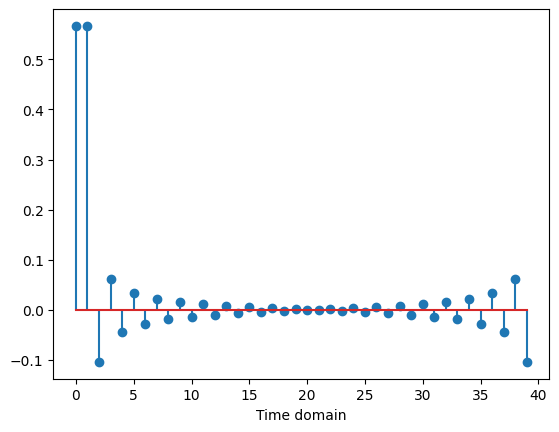

In [34]:
# Multiply filter by phase shift and do Inverse Fourier Transform.
z = np.fft.ifft(L * H)
for i in range(filter_size):
    print(z[i])
plt.stem(np.arange(filter_size),z.real)
plt.xlabel("Time domain")

Text(0.5, 0, 'Time domain')

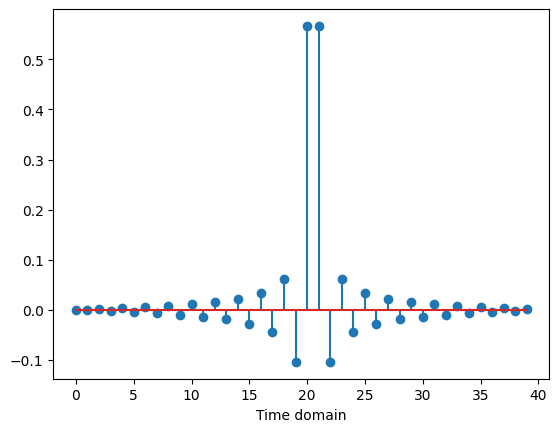

In [35]:
plt.stem(np.arange(filter_size), np.fft.fftshift(z).real)
plt.xlabel("Time domain")

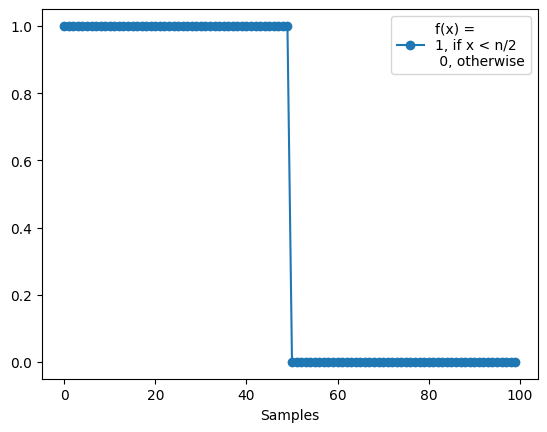

In [10]:
n = 100
x_o = np.arange(n)
xn = n * 0.5
x = x_o < xn
x = np.array(x)
plt.plot(x_o,x, marker ='o', label="f(x) = \n1, if x < n/2\n 0, otherwise")
plt.xlabel("Samples")
plt.legend()


<StemContainer object of 3 artists>

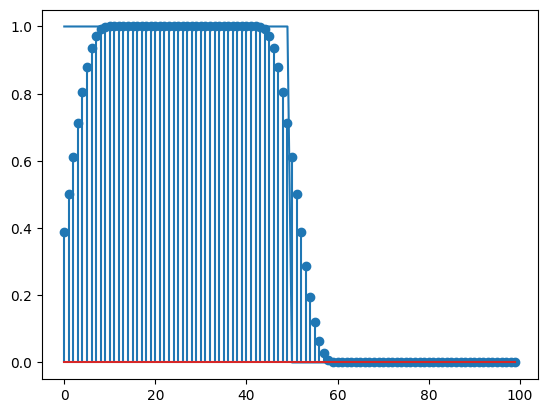

In [11]:
x_shifted_filter = np.zeros(n, dtype=complex)
x_shifted_filter = np.convolve(x,np.fft.fftshift(z), 'same')
plt.plot(x_o,x)
plt.stem(x_o,x_shifted_filter.real)

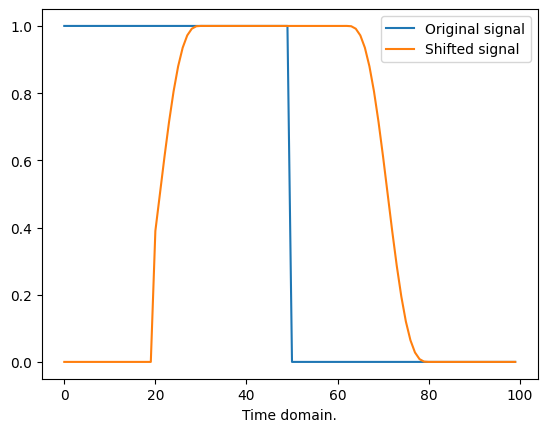

In [12]:
x_shifted = np.zeros(n, dtype=complex)
for i in range(n):
        new_index = (i + int(SHIFT))
        if new_index < n:
            x_shifted[new_index] = x_shifted_filter[i]
plt.plot(x_o,x, label="Original signal")
plt.plot(x_o,x_shifted.real, label= "Shifted signal")
plt.xlabel("Time domain.")
plt.legend()